In [ ]:
##GitHub code : 

Load Package

In [33]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt 
%matplotlib inline

MNIST train, test dataset 가져오기

In [34]:
mnist_train= dset.MNIST("",train =True, transform= transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("",train =False, transform= transforms.ToTensor(), target_transform=None, download=True)

대략적인 데이터 형태

mnist_train의 길이 :  60000
mnist_test의 길이 :  10000
image data 형태 : torch.Size([1, 28, 28])
label :  5


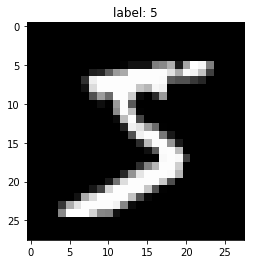

In [35]:
print "mnist_train의 길이 : ", len(mnist_train)
print "mnist_test의 길이 : ", len(mnist_test)

image, label = mnist_train.__getitem__(0)
print "image data 형태 :", image.size()
print "label : ", label

img = image.numpy()
plt.title("label: %d" %label)
plt.imshow(img[0], cmap ='gray')
plt.show()

5
torch.Size([1, 28, 28])
5


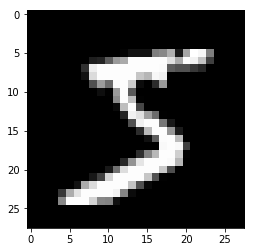

0


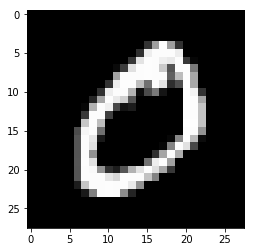

4


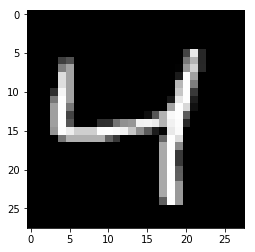

In [36]:
print(mnist_train[0][1])
print(mnist_train[0][0].size())

for i in range(3):
    img=mnist_train[i][0].numpy()
    print(mnist_train[i][1])
    plt.imshow(img[0],cmap='gray')
    plt.show()

# convolution 하나 씌워보기

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


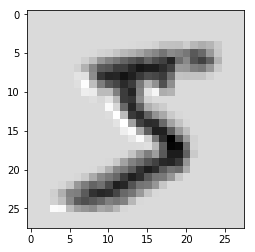

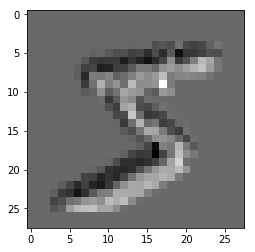

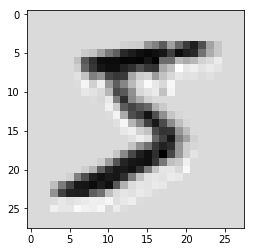

In [37]:
#mniat의 첫 번째 이미지, 라벨 가져오기
image, label =mnist_train[0]
#view: tensor의 사이즈 조절 -1: 해당 차원을 확장시키라는 의미
#[1,28,28] ->[1,1,28,28] reshape
image = image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print label

#convolution filter
conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1) #디폴트로 제로패딩
#이미지에 필터 적용
output = conv_layer(Variable(image))
print(output.size())

for i in range(3):
    plt.imshow(output[0,i,:,:].data.numpy(), cmap='gray')
    plt.show()

## CNN 만들기

train, test data 가져오기

In [38]:
import numpy as np
import torch.optim as optim

batch_size =16
learning_rate=0.0002
num_epoch=10

In [39]:
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader((mnist_train), batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)
#일정한 결과를 얻기 위해 test에서는 셔플 미진행

CNN 클래스 만들기 (모델 만들기)

In [40]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer=nn.Sequential(
            nn.Conv2d(1,16,5,padding=2),
            nn.ReLU(),
           
            
            nn.Conv2d(16,32,5,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(32,64,5,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )

        self.fc_layer=nn.Sequential(
            nn.Linear(64*7*7, 100),
            nn.ReLU(),
            nn.Linear(100,10)
        )
        

    def forward(self,x):
        out=self.layer(x)
        out=out.view(batch_size, -1)
        out=self.fc_layer(out)
        return out
    
model=CNN() #.cuda()

In [41]:
#파라미터 체크하기
for parameter in model.parameters(): 
    #print(parameter) #실제 원소 값을 볼 수 있다!
    print(parameter.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [42]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# optimization

In [43]:
for i in range(num_epoch):
    for j, [image, label] in (enumerate(train_loader)):
        x=Variable(image)#.cuda()
        y_=Variable(label)#.cuda()

        optimizer.zero_grad()
        output=model.forward(x)
        loss=loss_func(output,y_) #(예측값, 정답)
        loss.backward()  # backword로 gradient 계산
        optimizer.step() # 파라미터 갱신

        if j%50==0:
            print(loss,j,i)

(tensor(2.3131, grad_fn=<NllLossBackward>), 0, 0)
(tensor(1.7476, grad_fn=<NllLossBackward>), 50, 0)
(tensor(0.5729, grad_fn=<NllLossBackward>), 0, 1)
(tensor(0.5782, grad_fn=<NllLossBackward>), 50, 1)
(tensor(1.1769, grad_fn=<NllLossBackward>), 0, 2)
(tensor(0.2560, grad_fn=<NllLossBackward>), 50, 2)
(tensor(0.0845, grad_fn=<NllLossBackward>), 0, 3)
(tensor(0.1239, grad_fn=<NllLossBackward>), 50, 3)
(tensor(0.1801, grad_fn=<NllLossBackward>), 0, 4)
(tensor(0.2344, grad_fn=<NllLossBackward>), 50, 4)
(tensor(0.3320, grad_fn=<NllLossBackward>), 0, 5)
(tensor(0.1446, grad_fn=<NllLossBackward>), 50, 5)
(tensor(0.1855, grad_fn=<NllLossBackward>), 0, 6)
(tensor(0.1344, grad_fn=<NllLossBackward>), 50, 6)
(tensor(0.0634, grad_fn=<NllLossBackward>), 0, 7)
(tensor(0.0562, grad_fn=<NllLossBackward>), 50, 7)
(tensor(0.0525, grad_fn=<NllLossBackward>), 0, 8)
(tensor(0.0320, grad_fn=<NllLossBackward>), 50, 8)
(tensor(0.0082, grad_fn=<NllLossBackward>), 0, 9)
(tensor(0.0690, grad_fn=<NllLossBackward>

In [47]:
#모델 저장시키기
torch.save(model, 'nets/mycnn_model_%d.pki'%(num_epoch))

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [48]:
try:
    #미리 학습시킨 네트워크의 파라미터 집합 [피클]이라고 부름
    model=torch.load('nets/mycnn_model_10.pki')
    print("model restored")
except :
    print("model not restored")

model restored


In [45]:
#성능 측정을 위한 함수
def ComputeAccr(dloader, imodel):
    correct=0
    total =0
    
    for j, [imgs, labels] in enumerate(dloader):
        img = Variable(imgs, volatile=True) #.cuda() #GPU가속을 받는 경우 마지막에 .cuda()추가
        #label = Variable(lable) #y
        label = Variable(labels)#.cuda()
        
        output = imodel.forward(img)
        _, output_index =torch.max(output, 1)
        
        total += label.size(0)
        correct += ((output_index == label).sum().float())
    print("Accuracy of Test Data : {}".format(100*correct/total))

In [46]:
ComputeAccr(test_loader, model)

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Accuracy of Test Data : 94.4966659546
